In [1]:
import matplotlib.pyplot as plt
import numpy as np

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)

# the x locations for the groups
ind = np.arange(N)
# the width of the bars: can also be len(x) sequence
width = 0.35

# xerr, yerr: 分别针对水平、垂直型误差
p1 = plt.bar(ind, menMeans, width, yerr = menStd)
# 将女堆放与男之上
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans, yerr=womenStd)

plt.ylabel('scores')
plt.title('Score by group and gender')
# 获取刻度值
print(plt.xticks())
# 设置刻度
plt.xticks(ind,['G1', 'G2', 'G3', 'G4', 'G5'])
# 设置标签
# legend()
# legend(labels)
# legend(handles, labels)
plt.legend((p1[0], p2[0]), ('Men','Women'))

plt.show()

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.]), <a list of 7 Text xticklabel objects>)


<Figure size 640x480 with 1 Axes>

### legend

#### 为特定线条制作图例

In [2]:
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection,HandlerTuple
from matplotlib.lines import Line2D
import numpy as np

np.exp(B) : 求e的幂次方、np.sqrt(B):求B的开方

Returns
lines
A list of `.Line2D` objects representing the plotted data.

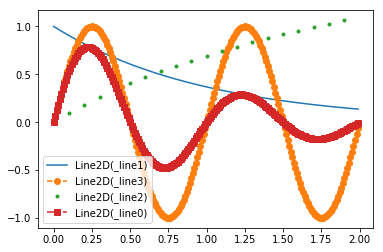

In [3]:
t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

fig ,ax = plt.subplots()

l1, = ax.plot(t2,np.exp(-t2))
l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), '--o', t1, np.log(1 + t1), '.')
l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 's-.')

ax.legend((l2,l4,l3,l1),loc=3)

### 更加复杂的标签

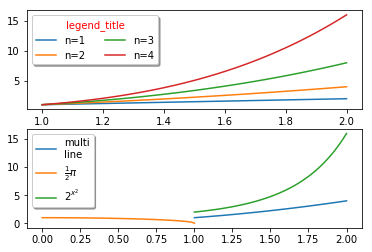

In [4]:
# default num=50
x = np.linspace(1,2)
fig,(ax0,ax1) = plt.subplots(2,1)

for n in range(1,5):
    ax0.plot(x,x**n,label="n={0}".format(n))
leg = ax0.legend(loc='upper left', bbox_to_anchor=[0,1],
                ncol=2,shadow=True, title='legend_title',fancybox=True)
leg.get_title().set_color('red')

# 更复杂的标签，plot里面加label
ax1.plot(x,x**2,label='multi\nline')
half_pi = np.linspace(0, np.pi/2)
ax1.plot(np.sin(half_pi), np.cos(half_pi), label=r'$\frac{1}{2}\pi$')
ax1.plot(x, 2**(x**2), label="$2^{x^2}$")
ax1.legend(shadow=True, fancybox=True)

plt.show()

### 绘制分类变量

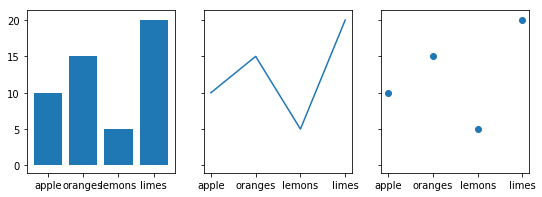

In [8]:
import matplotlib.pyplot as plt

data = {'apple': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

# figsize
fig, axs = plt.subplots(1,3,figsize=(9,3), sharey=True)
axs[0].bar(names, values)
axs[1].plot(names,values)
axs[2].scatter(names,values)

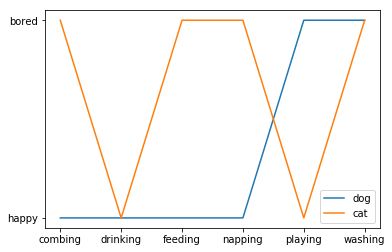

In [16]:
cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(activity, dog, label='dog')
ax.plot(activity, cat, label='cat')
# 显示ax的label
ax.legend()
plt.show()

### 绘制两个信号交叉密度

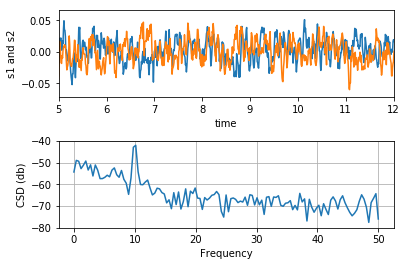

In [24]:
import numpy as np
import matplotlib.pyplot as plt

fig,(ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)
dt = 0.01
t = np.arange(0, 30, dt)
np.random.seed(110014)

# np.exp(B) : 求e的幂次方、np.sqrt(B):求B的开方
nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt
cnse2 = np.convolve(nse2, r, mode='same') * dt

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(5, 12)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s2')
# ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (db)')
plt.show()
